### August 21, 2020

### MSCA 37014 | Python for Analytics | Assignment 3 | Group Homework Project

### Professor: Shahbaz Chaudhary

### Team: Alberto Seo | Matt Kendall | Oleksiy Anokhin | Surendran Rangaraj

Our data-driven journalist department **(Alberto Seo | Matt Kendall | Oleksiy Anokhin | Surendran Rangaraj)** at the **Gargoyle Times** delivered a data-driven report, having explored Foreign Labor Certification data by the U.S. Department of Labor.

Data source: https://www.foreignlaborcert.doleta.gov/performancedata.cfm#dis 

In this report our team analyzed information about foreign workers on the US labor marker and data about their labor certification by the US federal agency. 

Trying to understand the situation with the certification of foreign workers, our department asked the following questions:

**Question 1: Origin and Education of Workers**

- What are the countries of origin of foreign workers?
- Which univerisities supply foreign workers for the US labor market and how much?

**Question 2: Acceptance Rate and Timing of Applications**

- What are the acceptance rates in percentages and which factors affect it?
- What is the waiting time for the procedure and which factors affect it?
- How does this information related to salaries of workers?
- How much applications are denied and what are the patterns?

**Disclamer: for techical purpose the cleaning part of the analysis was removed and is available in individual notebooks on GitHib** https://github.com/OleksiyAnokhin/MSCA-37014-Python-For-Analytics-Group-Project

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import json
import folium
import plotly.graph_objects as go
from IPython.display import Image
from IPython.core.display import HTML 
import math
import pickle
from scipy import interpolate
import csv, re, random
import matplotlib as mpl
from scipy import stats, integrate
import joypy
from scipy import stats

C:\Users\oleks\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Set additional parameters for images and tables

# Remove column display limits
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Set image parameters and style
plt.rcParams['figure.figsize'] = [15, 10]
sns.set_style("white")

In [3]:
# Create a team logo
Image(url = "https://i.ibb.co/v4X7cJC/image.png")

**Question 1: ORIGIN, EDUCATION, and VISAS of WORKERS**

**1.1. Calculate the citizenship of worker by the country of origin**

Which countries are the most prolific in their workforce supply? Probably India and China. But do we know exactly how much workers (per country of citizenship and count)?

Text(0.5, 1.0, 'Total workers by country')

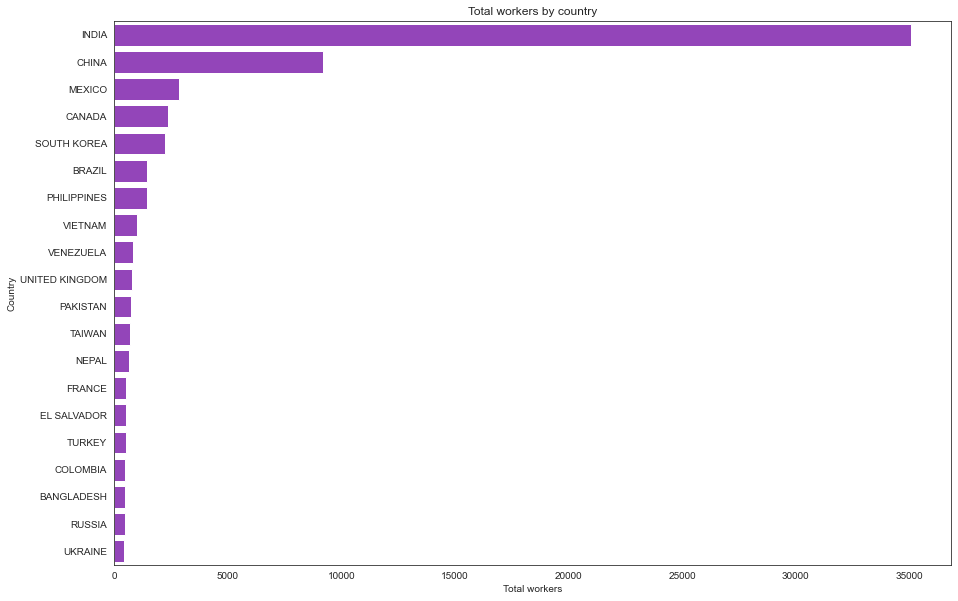

In [6]:
# Visualize data
ax = sns.barplot(x = 'total_workers', y = 'country', data = citizenship_20, color = "darkorchid")
ax.set(xlabel = 'Total workers', ylabel = 'Country')
ax.set_title('Total workers by country')

**1.2. Visualize a map of workers by country**

For better understanding of this, we created a map, highligting countries by their number of workers.

In [11]:
fig = px.choropleth(citizenship_df, locations="iso_alpha",
                    color = "total_workers", # Our 'total_workers' indicator
                    hover_name = "country", 
                    color_continuous_scale=px.colors.sequential.Tealgrn)
fig.show()

The only one important country, which is still missing and very visible due to its size. The reason - Russia or Russian Federation is absent in the plotly shapefile for some reason.

We can see that Indian workers dominate in this dataset, bringing 35000 people during the given period of tim

**1.3. Analyze universities, which supply the majority of foreign workers**

Universities, local and foreign, are the major suppliers of qualifaied labor to the US economy. We decided to analyze wich univeristies supply the foreign workforce to the US.

Below you can see that US and Indian universities dominate the game here, providing the most qualified workers.

Text(0.5, 1.0, 'Number of workers per University')

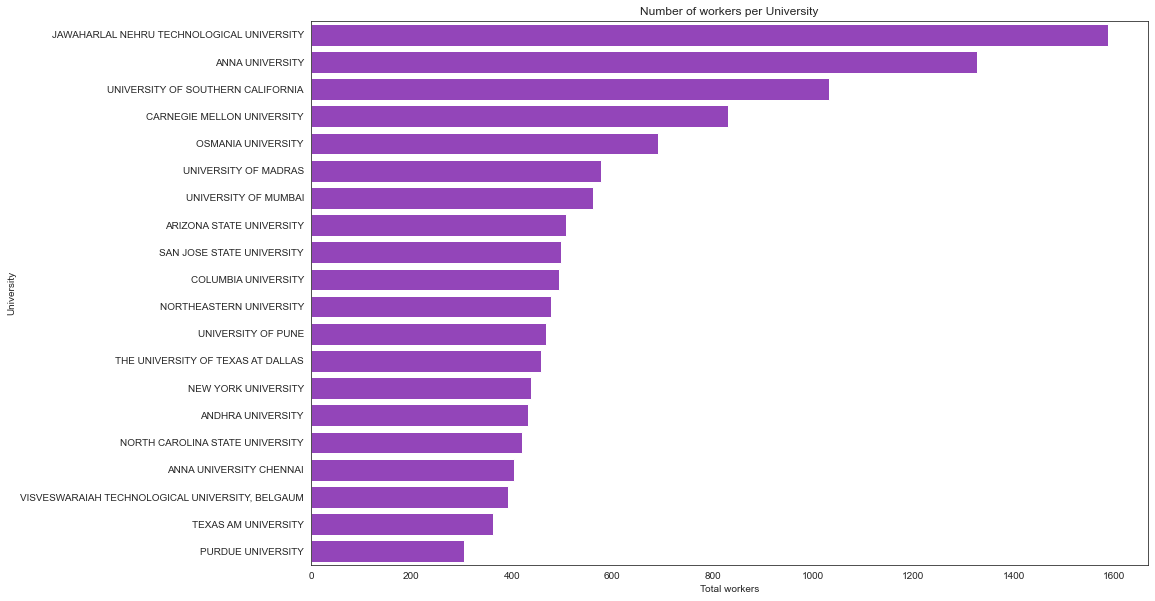

In [14]:
# Visualize
ax = sns.barplot(x = 'total_workers', y = 'university', data = universities20, color = 'darkorchid')
ax.set(xlabel = 'Total workers', ylabel = 'University')
ax.set_title('Number of workers per University')

**1.4. Create maps of top-10 univeristies by the number of workers**

In [17]:
# Define a base
univ_map = folium.Map(location=[0, 0], zoom_start = 2, tiles = 'Stamen Terrain')

# Create markers
folium.Marker([28.546619, 77.16256], popup='<b>Jawaharlal Nehru Technological University - 1588 workers</b>',
             icon=folium.Icon(color='orange', icon='info-sign')).add_to(univ_map)
folium.Marker([12.80495, 80.22649], popup='<b>Anna University - 1327 workers</b>',
             icon=folium.Icon(color='orange', icon='info-sign')).add_to(univ_map)
folium.Marker([34.044369, -118.205017], popup='<b>University Of Southern California - 1032 workers</b>',
             icon=folium.Icon(color='blue', icon='info-sign')).add_to(univ_map)
folium.Marker([40.62778, -78.65058], popup='<b>Carnegie Mellon University - 830 workers</b>',
             icon=folium.Icon(color='blue', icon='info-sign')).add_to(univ_map)
folium.Marker([17.402941, 78.513802], popup='<b>Osmania University - 691 worker</b>',
             icon=folium.Icon(color='orange', icon='info-sign')).add_to(univ_map)
folium.Marker([13.066, 80.2832], popup='<b>University Of Madras - 577 workers</b>',
             icon=folium.Icon(color='orange', icon='info-sign')).add_to(univ_map)
folium.Marker([18.9293, 72.831], popup='<b>University Of Mumbai - 562 workers</b>',
             icon=folium.Icon(color='orange', icon='info-sign')).add_to(univ_map)
folium.Marker([33.424564, -111.928001], popup='<b>Arizona State University - 508 workers</b>',
             icon=folium.Icon(color='blue', icon='info-sign')).add_to(univ_map)
folium.Marker([37.3352, -121.8811], popup='<b>San Jose State University - 499 workers</b>',
             icon=folium.Icon(color='blue', icon='info-sign')).add_to(univ_map)
folium.Marker([40.8075, -73.9626], popup='<b>Columbia University - 494 workers</b>',
             icon=folium.Icon(color='blue', icon='info-sign')).add_to(univ_map)

# Print
univ_map

In [18]:
# Define a base
univ_map = folium.Map(location=[0, 0], zoom_start = 2, tiles = 'Stamen Terrain')

# Create markers
folium.Circle([28.546619, 77.16256], radius = 1588000, popup='<b>Jawaharlal Nehru Technological University - 1588 workers</b>',
             color = 'orange').add_to(univ_map)
folium.Circle([12.80495, 80.22649], radius = 1327000, popup='<b>Anna University - 1327 workers</b>',
             color = 'orange').add_to(univ_map)
folium.Circle([34.044369, -118.205017], radius = 1032000, popup='<b>University Of Southern California - 1032 workers</b>',
             color = 'blue').add_to(univ_map)
folium.Circle([40.62778, -78.65058], radius = 830000, popup='<b>Carnegie Mellon University - 830 workers</b>',
             color = 'blue').add_to(univ_map)
folium.Circle([17.402941, 78.513802], radius = 691000, popup='<b>Osmania University - 691 worker</b>',
             color = 'orange').add_to(univ_map)
folium.Circle([13.066, 80.2832], radius = 577000, popup='<b>University Of Madras - 577 workers</b>',
             color = 'orange').add_to(univ_map)
folium.Circle([18.9293, 72.831], radius = 562000, popup='<b>University Of Mumbai - 562 workers</b>',
             color = 'orange').add_to(univ_map)
folium.Circle([33.424564, -111.928001], radius = 508000, popup='<b>Arizona State University - 508 workers</b>',
             color = 'blue').add_to(univ_map)
folium.Circle([37.3352, -121.8811], radius = 499000, popup='<b>San Jose State University - 499 workers</b>',
             color = 'blue').add_to(univ_map)
folium.Circle([40.8075, -73.9626], radius = 494000, popup='<b>Columbia University - 494 workers</b>',
             color = 'blue').add_to(univ_map)

# Print
univ_map

What can we see here? **Only the US universities and Indian universities are the biggest suppliers of the qualiied workforce (top-10)**.

In the US these are - two universties from West Coast, two - from East Coast, and one from Arizone (click on markers). 

Outside of the US - **all the biggest suppliers are Inidan universities.**

**1.5. Foreign workers by visa type**

As we can see, **H-1B, L-1, and F-1 are dominating categories** in our dataset.

Text(0.5, 1.0, 'Types of status - 20 most frequent statuses')

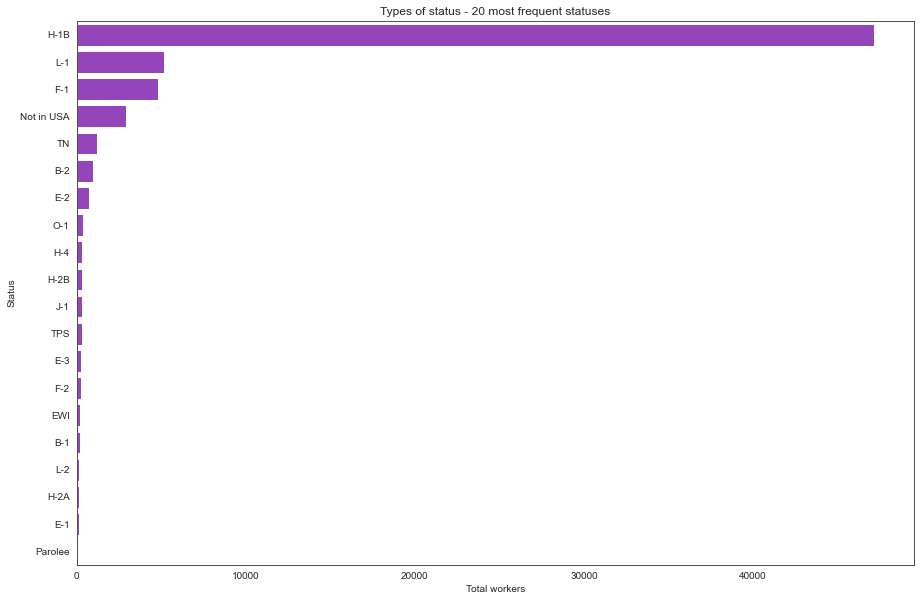

In [20]:
# Visaulize data
ax = sns.barplot(x = "total_workers", y = "status", data = employment_20, color = 'darkorchid')
ax.set(xlabel = 'Total workers', ylabel = 'Status')
ax.set_title('Types of status - 20 most frequent statuses')

As we can see, H1-B workers heavily in this dataset. 

**Question 1. Conclusion**

We can make the following conclusions: 

- Indian workers dominate tremendously the US labour market as foreign workers
- US and Indian universities are the major suppliers of foreign workforce
- H1-B professionals dominate the US labor market

**Question 2: ACCEPTANCE RATE and TIMING* of APPLICATIONS**

**2.1. Acceptance rates**

**2.1.1. Percent of Applications Accepted by Decision Month**

All cases decided in 2019 have a separate certification designation than those in 2020. The volume of decisions is much lower from Nov 2019 through Feb 2020 than the other months. In the graphs below, we are assuming `Certified` and `Certified-Expired` are equivalent outcomes from the perspective of the applicant.

Text(0.5, 1.0, 'Percent of Applications Accepted by Decision Month')

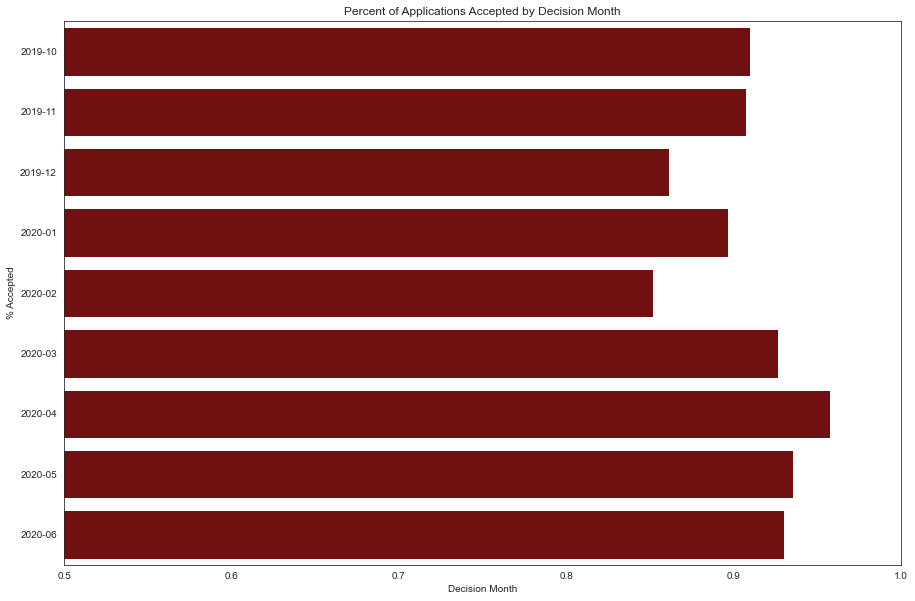

In [29]:
# Visualize
table = pd.crosstab(df.decision_month, df.case_status)
table['cert'] = table['Certified'] + table['Certified-Expired']
table = table.drop(['Certified', 'Certified-Expired'], axis=1)
table['pct_accepted'] = table['cert']/table.sum(axis=1)
table = table[['pct_accepted']]
ax = sns.barplot(y = table.index, x = table.pct_accepted, color = 'maroon', orient='h')
ax.set(xlabel = 'Decision Month', ylabel = '% Accepted', xlim=(0.5, 1))
ax.set_title('Percent of Applications Accepted by Decision Month')

**2.1.2. Acceptance by NAICS category**

The chart below demonstrates that 33 and 45 out into different subgroups to get more info, but it seems like the remainder of the top 5 (51, 55, 52) likely correspond to high paying positions. At the bottom, we tend to see the opposite. These are industries dominated by blue collar jobs. 

For reference, here are the different NAICS group classes. 

- 11	Agriculture, Forestry, Fishing and Hunting
- 21	Mining
- 22	Utilities
- 23	Construction
- 31	Manufacturing
- 32  Manufacturing
- 33  Manufacturing
- 42	Wholesale Trade
- 44  Retail Trade
- 45	Retail Trade
- 48  Transportation and Warehousing
- 49	Transportation and Warehousing
- 51	Information
- 52	Finance and Insurance
- 53	Real Estate Rental and Leasing
- 54	Professional, Scientific, and Technical Services
- 55	Management of Companies and Enterprises
- 56	Administrative and Support and Waste Management and Remediation Services
- 61	Educational Services
- 62	Health Care and Social Assistance
- 71	Arts, Entertainment, and Recreation
- 72	Accommodation and Food Services
- 81	Other Services (except Public Administration)
- 92	Public Administration

Text(0.5, 1.0, 'Percent of Applications Accepted by NAICS Group')

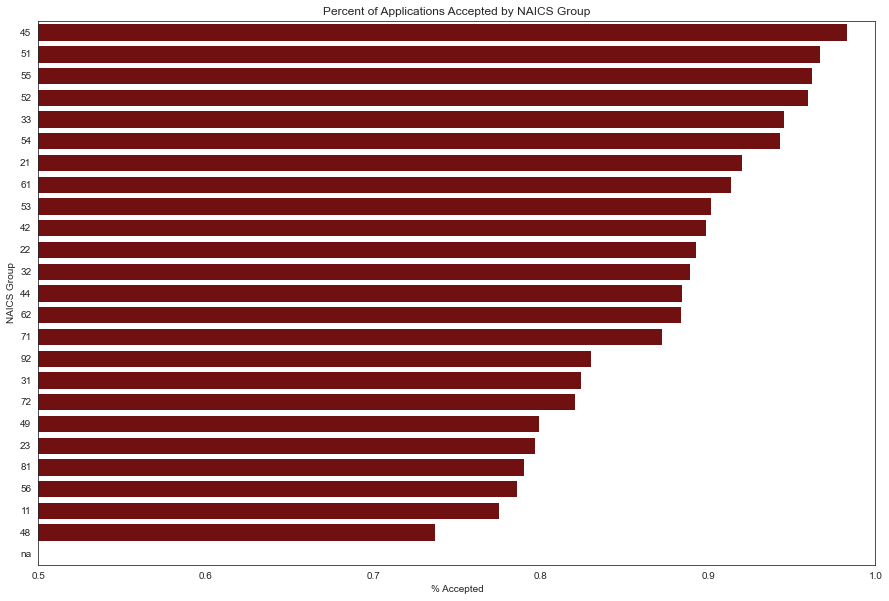

In [30]:
# Visualize
table = pd.crosstab(df.naics_group, df.case_status)
table['cert'] = table['Certified'] + table['Certified-Expired']
table = table.drop(['Certified', 'Certified-Expired'], axis=1)
table['pct_accepted'] = table['cert']/table.sum(axis=1)
table = table[['pct_accepted']].sort_values('pct_accepted', ascending=False)
ax = sns.barplot(y = table.index, x = table.pct_accepted, color = 'maroon')
ax.set(ylabel = 'NAICS Group', xlabel = '% Accepted', xlim=(0.5, 1))
ax.set_title('Percent of Applications Accepted by NAICS Group')

**2.1.3. Percent of Applications Accepted by Visa Type**

We can see that certain visa types has a higher percentage of acceptance than others. **L-1 and H1B** definitely lead the game here.

Text(0.5, 1.0, 'Percent of Applications Accepted by Visa Type')

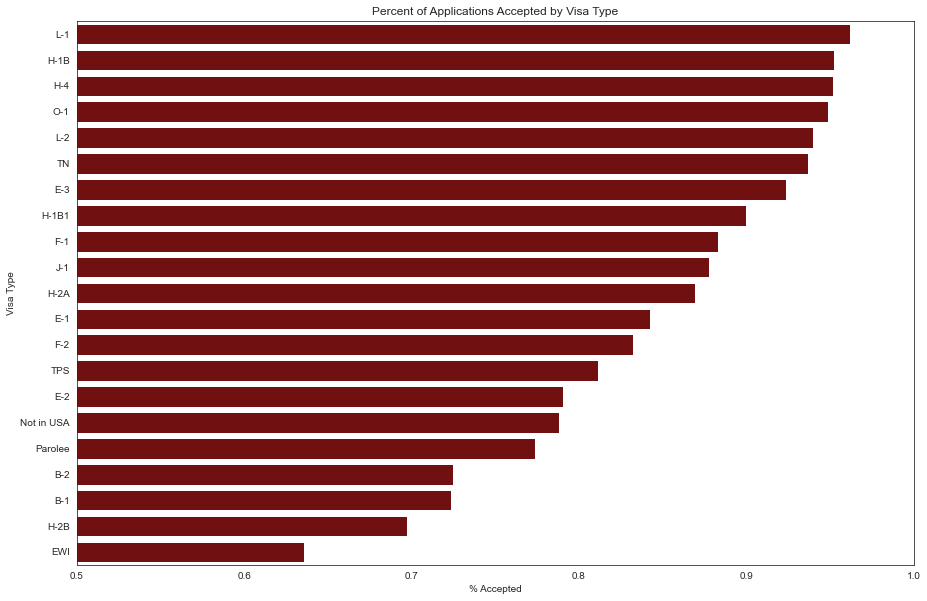

In [31]:
# Visualize
table = pd.crosstab(df.class_of_admission, df.case_status)
table['cert'] = table['Certified'] + table['Certified-Expired']
table = table.drop(['Certified', 'Certified-Expired'], axis=1)
table['pct_accepted'] = table['cert']/table.sum(axis=1)
table = table[table.sum(axis=1) > 50]
table = table[['pct_accepted']].sort_values('pct_accepted', ascending = False)
ax = sns.barplot(y = table.index, x = table.pct_accepted, color = 'maroon')
ax.set(ylabel = 'Visa Type', xlabel = '% Accepted', xlim=(0.5, 1))
ax.set_title('Percent of Applications Accepted by Visa Type')

**2.1.4 Percent of Applications Accepted by Country**

There are some interesting observations here too. Some countries have a better performance in percent. For instance, Russia has the second highest percentage of accepted applications, being only 19th in the list by number of applications with 452 workers. It means almost every Russian national has very high chance to be accepted (probably due to the quality of their IT specialists).

Text(0.5, 1.0, 'Percent of Applications Accepted by Visa Type')

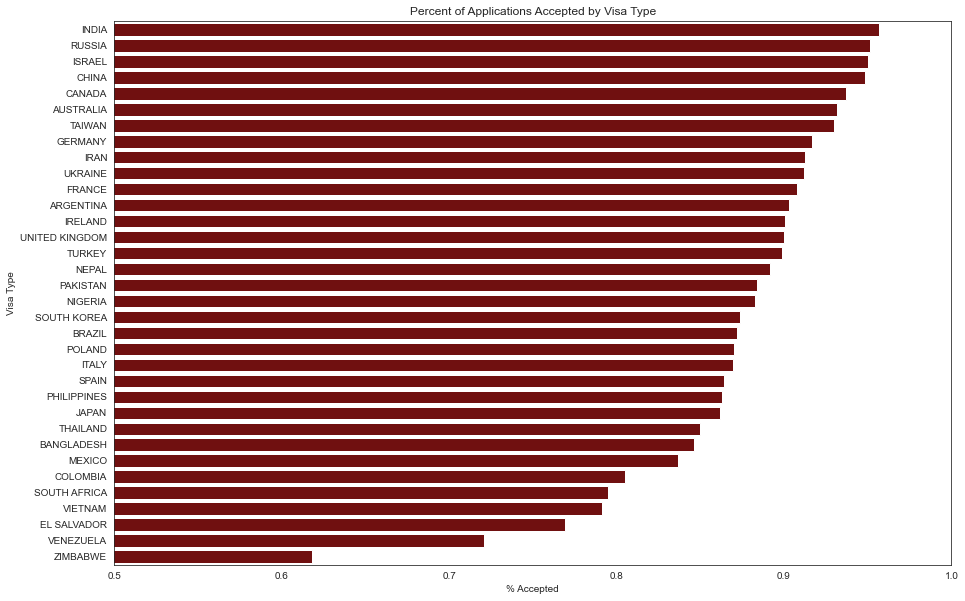

In [32]:
# Visualize
table = pd.crosstab(df.country_of_citizenship, df.case_status)
table['cert'] = table['Certified'] + table['Certified-Expired']
table = table.drop(['Certified', 'Certified-Expired'], axis=1)
table['pct_accepted'] = table['cert']/table.sum(axis=1)
table = table[table.sum(axis=1) > 200]
table = table[['pct_accepted']].sort_values('pct_accepted', ascending=False)
ax = sns.barplot(y = table.index, x = table.pct_accepted, color = 'maroon')
ax.set(ylabel = 'Visa Type', xlabel = '% Accepted', xlim=(0.5, 1))
ax.set_title('Percent of Applications Accepted by Visa Type')

**2.2. Salaries**

**2.2.1. Salaries by NAICS category**

A huge difference by NAICS group. As expected the same groups appear at the top (51, 52, 55) and bottom (11) as in the same chart for acceptance rate, validating our assumption that salary of position is the main driver in the variation of results by NAICS group. A possible extension is to look at that effect more rigorously.

Text(0.5, 1.0, 'Mean Salary by NAICS Group')

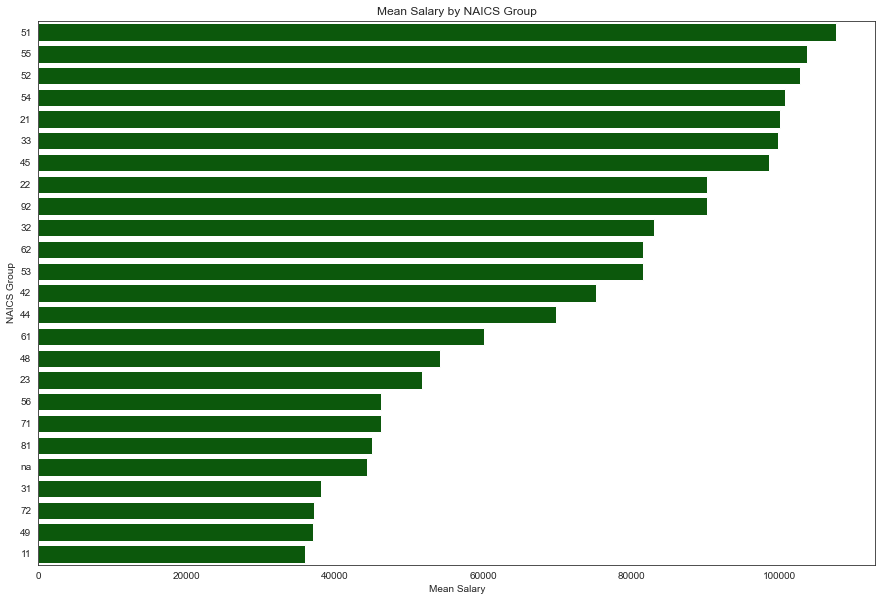

In [34]:
# Visualize
table = df.groupby("naics_group", as_index=False)["pw_wage_adj"].mean().sort_values('pw_wage_adj', ascending=False).head(25)
ax = sns.barplot(y = table.iloc[:, 0], x = table.iloc[:, 1], color = 'darkgreen', orient='h')
ax.set(ylabel = 'NAICS Group', xlabel = 'Mean Salary')
ax.set_title('Mean Salary by NAICS Group')

**2.2.2. Salaries by Visa Type**

Major differences in salary by visa type as well. Notable that the most common and most accepted visas don't necessarily correspond to the highest salaries.

For instance, **G-4 has a higher mean salary than H-1B**. G-4 is a visa type for members of international organizations - United Nations, World Bank Group, NATO, etc. Plus G-4 holders do not pay any taxes in the US. 

Text(0.5, 1.0, 'Mean Salary by Visa Type')

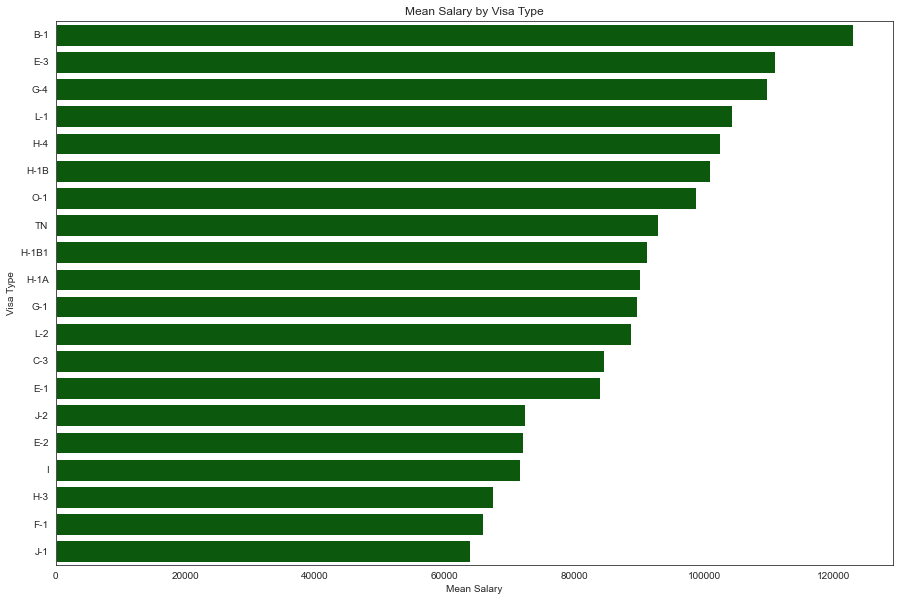

In [35]:
# Visualize
table = df.groupby("class_of_admission", as_index=False)["pw_wage_adj"].mean().sort_values('pw_wage_adj', 
                   ascending=False).head(20)
ax = sns.barplot(y = table.iloc[:, 0], x = table.iloc[:, 1], color = 'darkgreen', orient='h')
ax.set(ylabel = 'Visa Type', xlabel = 'Mean Salary')
ax.set_title('Mean Salary by Visa Type')

**2.3. Waiiting Time**

**2.3.1. Mean Wait Time by NAICS Category**

Our highest paid and most accpeted NAICS groups also get the benefit of the shortest wait times. Interesting that the 'na' group has the highest wait times. Indicitive perhaps that applications with missing data or otherwise don't conform are subject to more scrutiny? It could also be that it's an outcome of how applications are processed.

Text(0.5, 1.0, 'Mean Wait Time by NAICS Group')

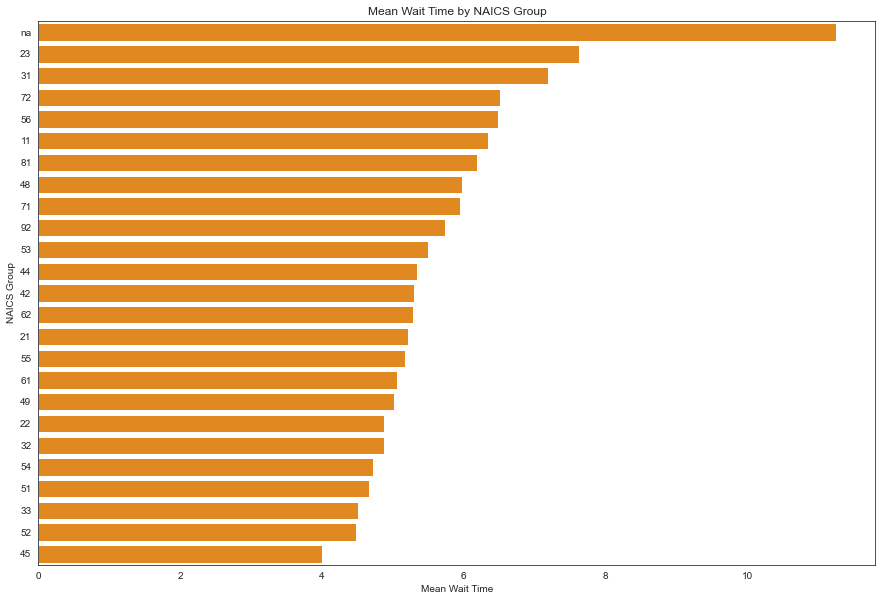

In [36]:
# Visualize
table = df.groupby("naics_group", as_index=False)["wait_time"].mean()
table['count'] = table['naics_group'].map(df['naics_group'].value_counts())
table = table.sort_values('wait_time', ascending=False)
ax = sns.barplot(y = table.iloc[:, 0], x = table.iloc[:, 1], color = 'darkorange', orient='h', order = table['naics_group'])
ax.set(ylabel = 'NAICS Group', xlabel = 'Mean Wait Time')
ax.set_title('Mean Wait Time by NAICS Group')

**2.3.2. Mean Wait Time by Country of Citizenship**

The same logic is here. Applicants with the highest acceptance and mean salary by country get their visas faster. 
And visa versa. 

Text(0.5, 1.0, 'Mean Wait Time by Country of Citizenship')

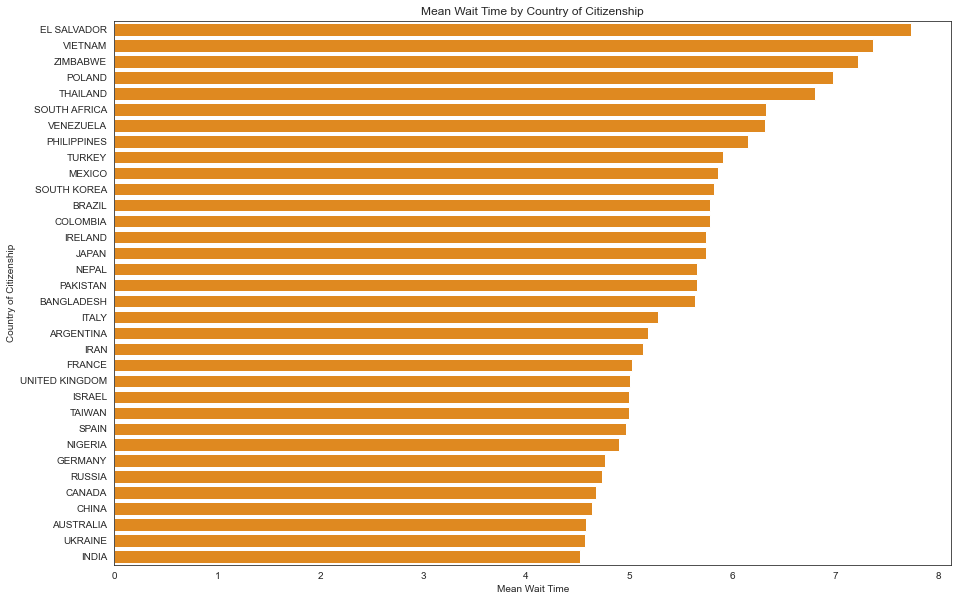

In [39]:
# Visualize
table = df.groupby("country_of_citizenship", as_index=False)["wait_time"].mean()
table['count'] = table['country_of_citizenship'].map(df['country_of_citizenship'].value_counts())
table = table[table['count'] > 200].sort_values('wait_time', ascending=False)
ax = sns.barplot(y = table.iloc[:, 0], x = table.iloc[:, 1], color = 'darkorange', orient='h')
ax.set(ylabel = 'Country of Citizenship', xlabel = 'Mean Wait Time')
ax.set_title('Mean Wait Time by Country of Citizenship')

**2.4.1. Acceptance Rate by Company Size**

The size of the company matters. Big companies can afford lawyers, many hirings, and have a pipleine of foreign workers. The chart below confirms it. We can see that the highest acceptance rate is for the companies woth 1000+ workers.

Text(0.5, 1.0, 'Acceptance Rate by Company Size')

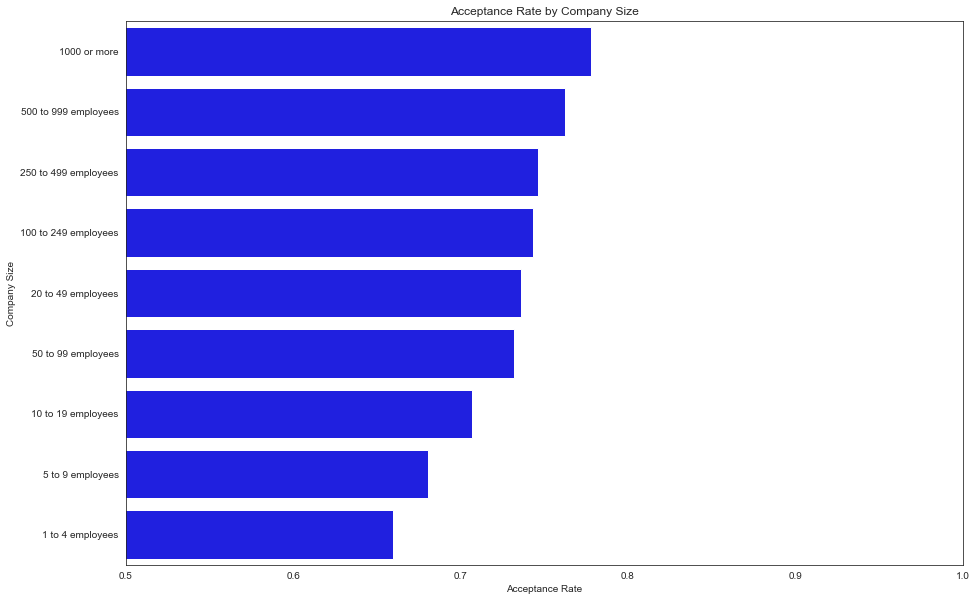

In [15]:
# Visualize
table = pd.crosstab(cleaned.COMPANY_SIZE, cleaned.CASE_STATUS)
table['Certified'] = table['Certified'] + table['Certified-Expired']
table['ACCEPTANCE_RATE'] = table['Certified']/table.sum(axis=1)
table = table[['ACCEPTANCE_RATE']].sort_values('ACCEPTANCE_RATE', ascending = False)
ax = sns.barplot(y = table.index, x = table.ACCEPTANCE_RATE, color = 'blue', orient='h')
ax.set(xlabel = 'Acceptance Rate', ylabel = 'Company Size', xlim=(0.5, 1))
ax.set_title('Acceptance Rate by Company Size')

**2.4.2. Acceptance Rate by Minimum Education Required**

Does the education affects your chances to be accepted? Yes, the higher is your educational level (degree), the better chance you have.

Text(0.5, 1.0, 'Acceptance Rate by Minimum Education Required')

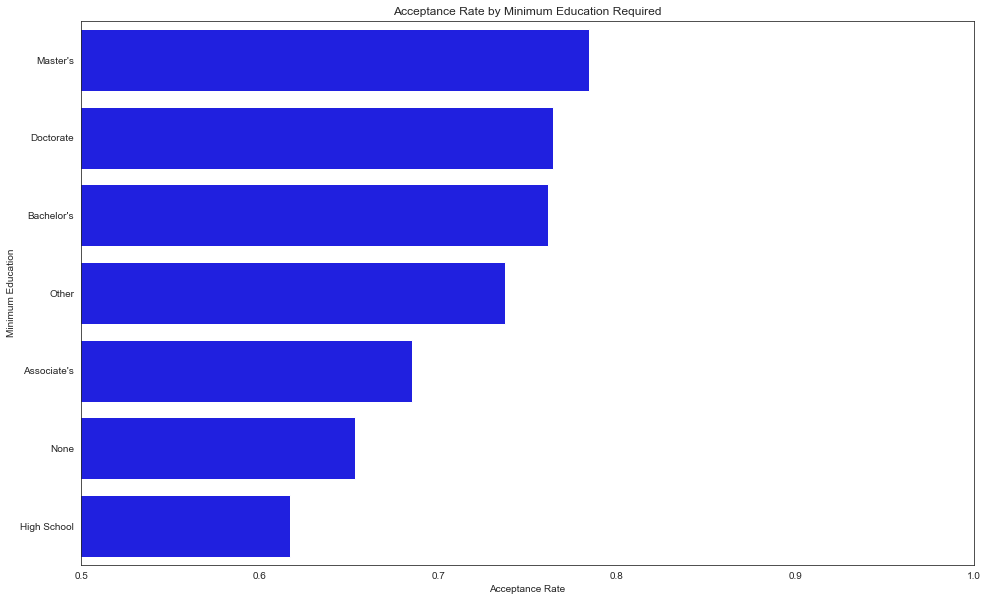

In [16]:
# Visualzie
table = pd.crosstab(cleaned.MINIMUM_EDUCATION, cleaned.CASE_STATUS)
table['Certified'] = table['Certified'] + table['Certified-Expired']
table['ACCEPTANCE_RATE'] = table['Certified']/table.sum(axis=1)
table = table[['ACCEPTANCE_RATE']].sort_values('ACCEPTANCE_RATE', ascending = False)
ax = sns.barplot(y = table.index, x = table.ACCEPTANCE_RATE, color = 'blue', orient='h')
ax.set(xlabel = 'Acceptance Rate', ylabel = 'Minimum Education', xlim=(0.5, 1))
ax.set_title('Acceptance Rate by Minimum Education Required')

**2.4.3. Acceptance Rate by Hired Company States**

Which states has the highest acceptance rate? We all expected to see here West and East Coasts, but it looks like MidWestern states also have good chances to bring good people from abroad. 

Text(0.5, 1.0, 'Acceptance Rate by Hired Company States')

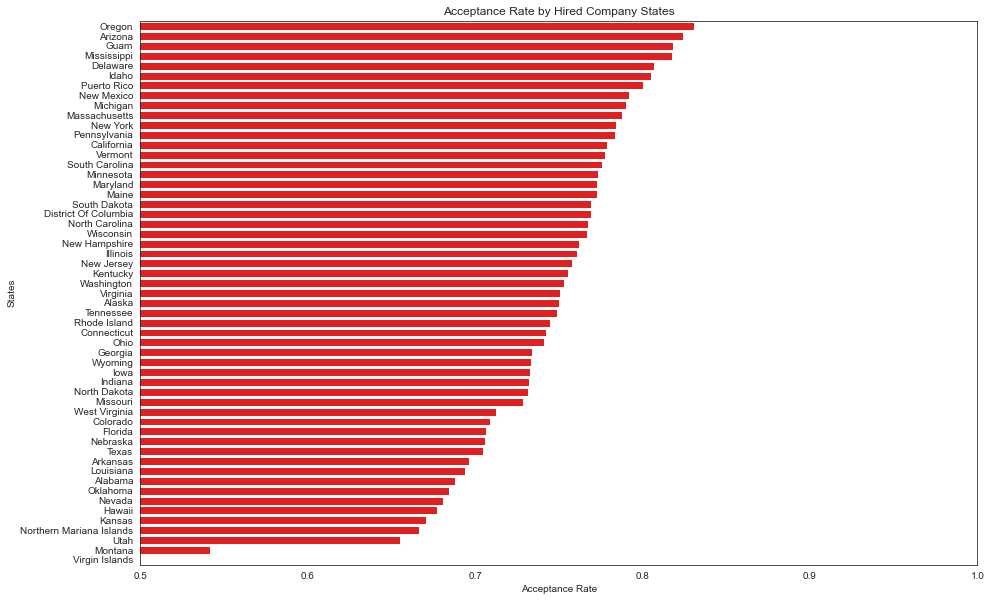

In [26]:
# Visualize
table = pd.crosstab(cleaned.WORKSITE_STATE, cleaned.CASE_STATUS)
table['Certified'] = table['Certified'] + table['Certified-Expired']
table['ACCEPTANCE_RATE'] = table['Certified']/table.sum(axis=1)
table = table[['ACCEPTANCE_RATE']].sort_values('ACCEPTANCE_RATE', ascending = False)
ax = sns.barplot(y = table.index, x = table.ACCEPTANCE_RATE, color = 'red', orient='h')
ax.set(xlabel = 'Acceptance Rate', ylabel = 'States', xlim=(0.5, 1))
ax.set_title('Acceptance Rate by Hired Company States')

**2.4.4. Average Duration by Visa Type**

How much should you wait for your case results? Unfortunately, some visa types holders will wait for a year on average. H-1B is about 4 months only.

Text(0.5, 1.0, 'Average Duration by Visa Type')

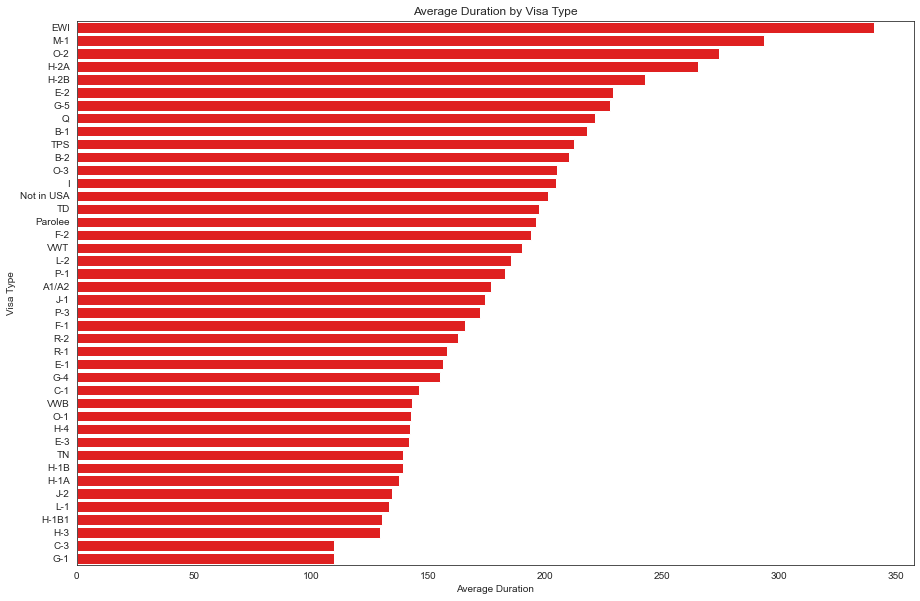

In [23]:
# Visualize
table = cleaned.groupby("CLASS_OF_ADMISSION", as_index=False)["CASE_DURATION"].mean().sort_values('CASE_DURATION', 
                                                                                                  ascending=False)
ax = sns.barplot(y = table.iloc[:, 0], x = table.iloc[:, 1], color = 'red', orient='h')
ax.set(ylabel = 'Visa Type', xlabel = 'Average Duration')
ax.set_title('Average Duration by Visa Type')

**2.4.5. Average Case Duration Rate by Salary**

Does salary matters for the average case duration? It does. We can see that the higher is your salary, the faster will be the process for a worker.

Text(0.5, 1.0, 'Average Duration by Salary Level')

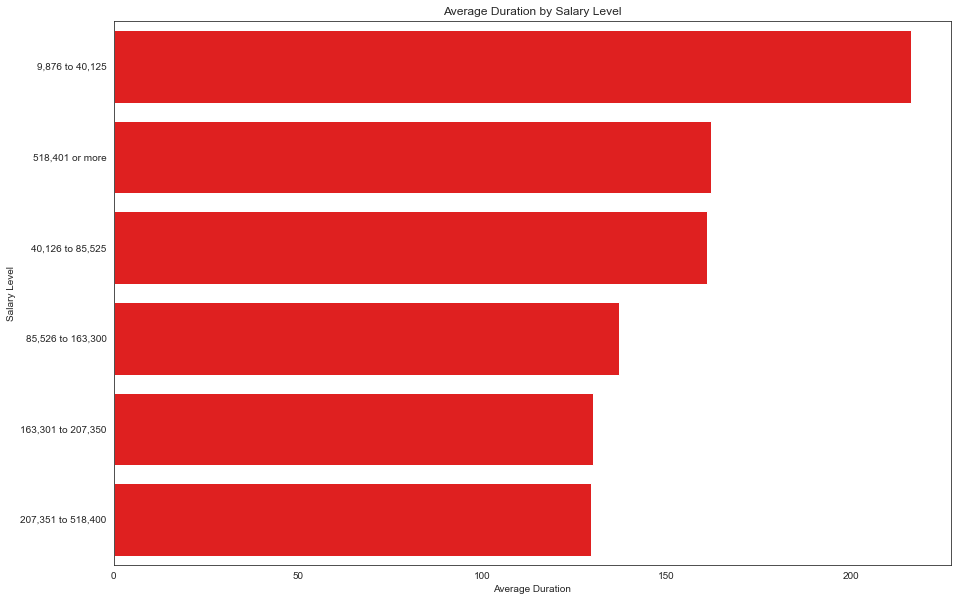

In [25]:
# Visualize
table = cleaned.groupby("SALARY_LEVEL", as_index=False)["CASE_DURATION"].mean().sort_values('CASE_DURATION', 
                                                                                            ascending=False)
ax = sns.barplot(y = table.iloc[:, 0], x = table.iloc[:, 1], color = 'red', orient='h')
ax.set(ylabel = 'Salary Level', xlabel = 'Average Duration')
ax.set_title('Average Duration by Salary Level')

**2.4.6. Average Duration by Skill Level**

We can see that the difference is not that important here. Level I has the highest duration, but the difference is not that big.

Text(0.5, 1.0, 'Average Duration by Skill Level')

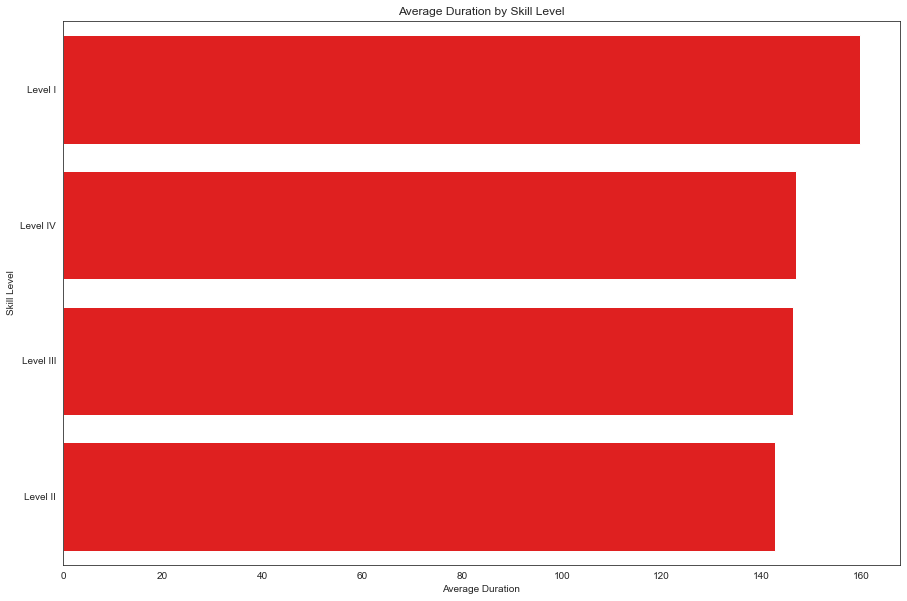

In [28]:
# Visualize
table = cleaned.groupby("PW_SKILL_LEVEL", as_index=False)["CASE_DURATION"].mean().sort_values('CASE_DURATION', 
                                                                                              ascending=False)
ax = sns.barplot(y = table.iloc[:, 0], x = table.iloc[:, 1], color = 'red', orient='h')
ax.set(ylabel = 'Skill Level', xlabel = 'Average Duration')
ax.set_title('Average Duration by Skill Level')

**2.5. Acceptance Rates and Denials**

**2.5.1. Denial of Applications by the Skill Level and Salary**

Do any patterns exist between the salary and the number of denief applications? Yes. Below you can see that Class I has the hugest denial with the lowest level of salaries. All three other classes look much less skewed.

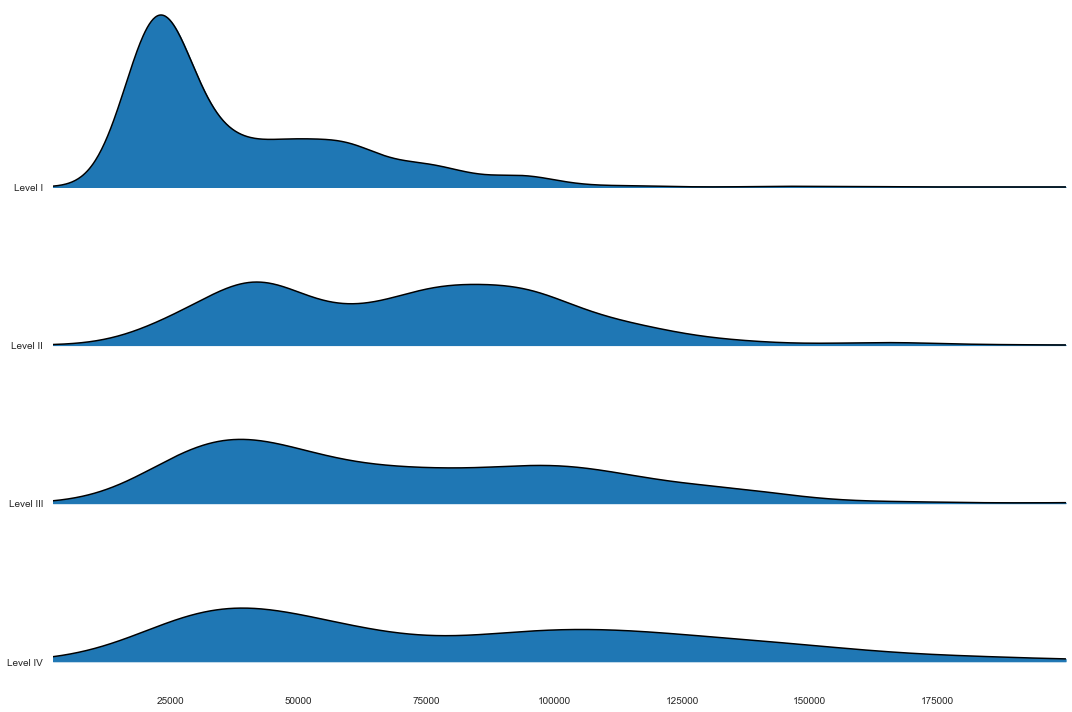

In [33]:
fig, axes = joypy.joyplot(denied_salary_df, by="PW_SKILL_LEVEL", column="ANNUAL_PW_SALARY",x_range=(2000,200000))
plt.show()

**2.5.2. Skill Level and Salary**

What is the distribution of salaries for different classes? This chart provides this information. 

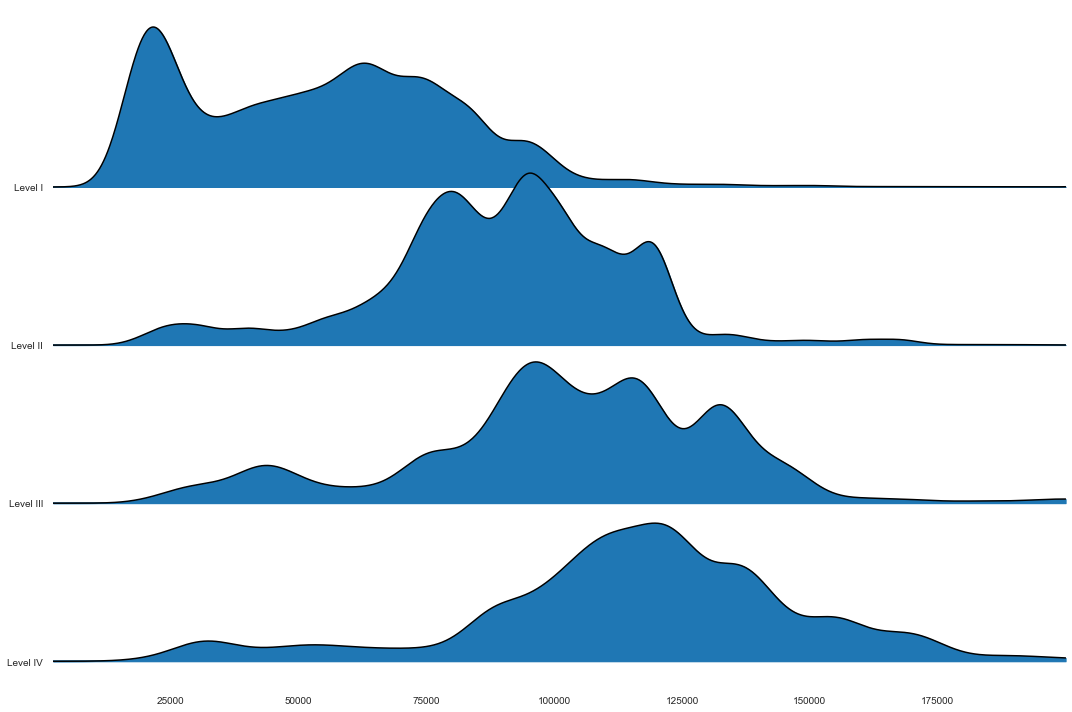

In [35]:
fig, axes = joypy.joyplot(certified_salary_df, by="PW_SKILL_LEVEL",column="ANNUAL_PW_SALARY",x_range=(2000,200000))
plt.show()

**2.5.3. Salary vs Skill Level vs Status**

Can we go even further and see see on a more granular level the relationship of slaries, skill levels, ans the final status of the application? We can and the patterns remain the same.

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 5700x3800 with 0 Axes>

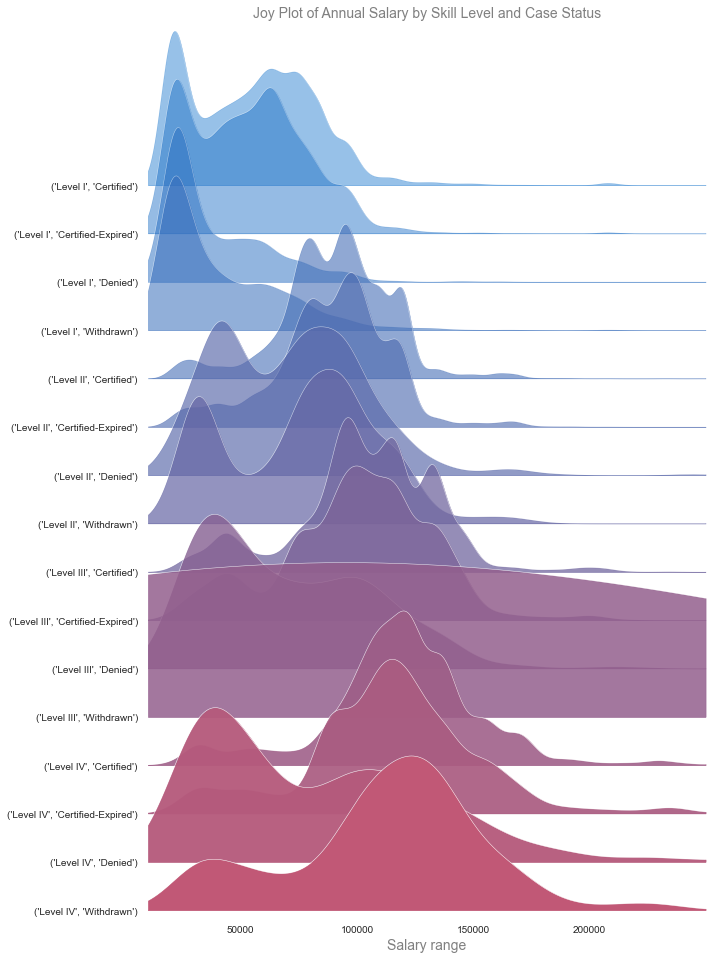

In [36]:
#create a color gradent function to be used in the colormap parameter
def color_gradient(x=0.0, start=(0, 0, 0), stop=(1, 1, 1)):
    r = np.interp(x, [0, 1], [start[0], stop[0]])
    g = np.interp(x, [0, 1], [start[1], stop[1]])
    b = np.interp(x, [0, 1], [start[2], stop[2]])
    return (r, g, b)
#show the table

#plot the figure
plt.figure(dpi=380)
fig, axes = joypy.joyplot(analyze_data
                          , column=["ANNUAL_PW_SALARY"]
                          , overlap=2.5
                          , by=["PW_SKILL_LEVEL","CASE_STATUS"]
                          , ylim='own'
                          , x_range=(10000,250000)
                          , fill=True
                          , figsize=(10,13)
                          , legend=False
                          , xlabels=True
                          , ylabels=True
                          #, color=['#76a5af', '#134f5c']
                          , colormap=lambda x: color_gradient(x, start=(.08, .45, .8)
                                                             ,stop=(.8, .34, .44))
                          , alpha=0.6
                          , linewidth=.5
                          , linecolor='w'
                          #, background='k' # change to 'k' for black background or 'grey' for grey
                          , fade=True)
plt.title('Joy Plot of Annual Salary by Skill Level and Case Status'
          , fontsize=14
          , color='grey'
          , alpha=1)
plt.rc("font", size=12)
plt.xlabel('Salary range', fontsize=14, color='grey', alpha=1)
plt.ylabel('Case-Skill', fontsize=8, color='grey', alpha=1)
plt.show

**2.5.4. Case status vs Skill Level**

Can we compare the different levels and their status? We can see Level 2 is pretty hight here. As we found out before, Level 1 gets the majority of rejectons.

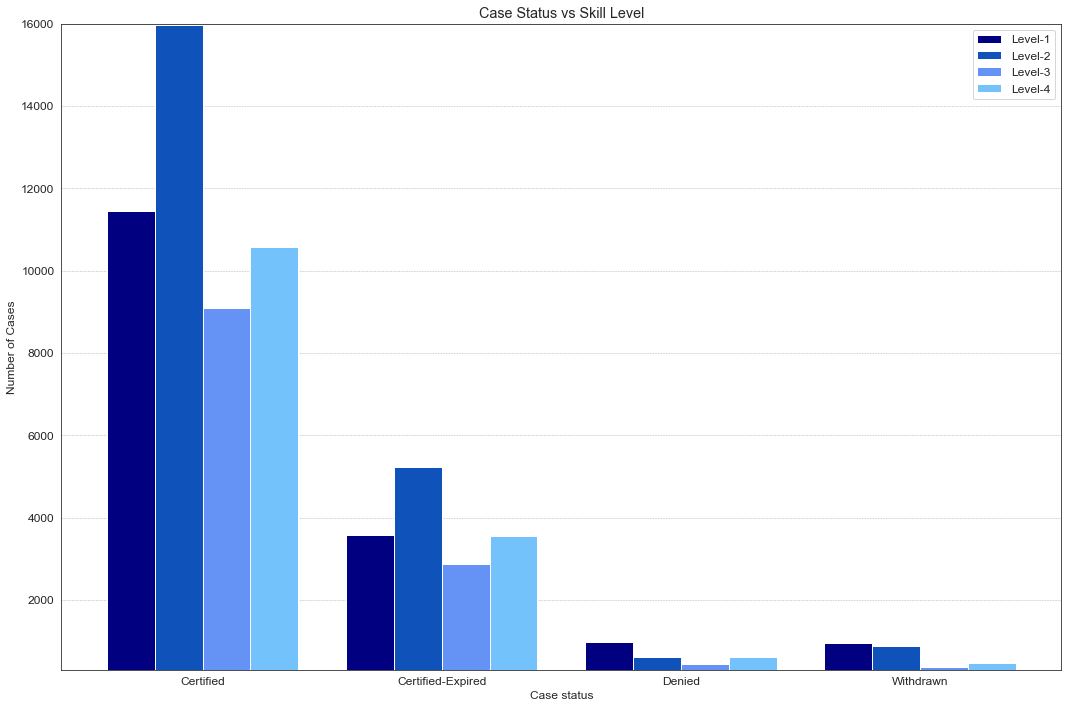

In [39]:
labels = ['Certified', 'Certified-Expired', 'Denied', 'Withdrawn']

x = np.arange(len(analyze_data.CASE_STATUS.unique()))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x, skill_case_status.iloc[:,0], width, color='#000080', label='Level-1')
ax.bar(x + width, skill_case_status.iloc[:,1], width, color='#0F52BA', label='Level-2')
ax.bar(x + (2 * width), skill_case_status.iloc[:,2], width, color='#6593F5', label='Level-3')
ax.bar(x + (3*width), skill_case_status.iloc[:,3], width, color='#73C2FB', label='Level-4')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Cases')
ax.set_xlabel('Case status')
ax.set_title('Case Status vs Skill Level')
ax.set_xticks(x + width + width/2)
ax.set_ylim(300,16000)
ax.set_xticklabels(labels)
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.show()

**2.5.5. Denied vs Withdrawn Cases**

What if we compare only two categories? Their patterns look pretty similar. 

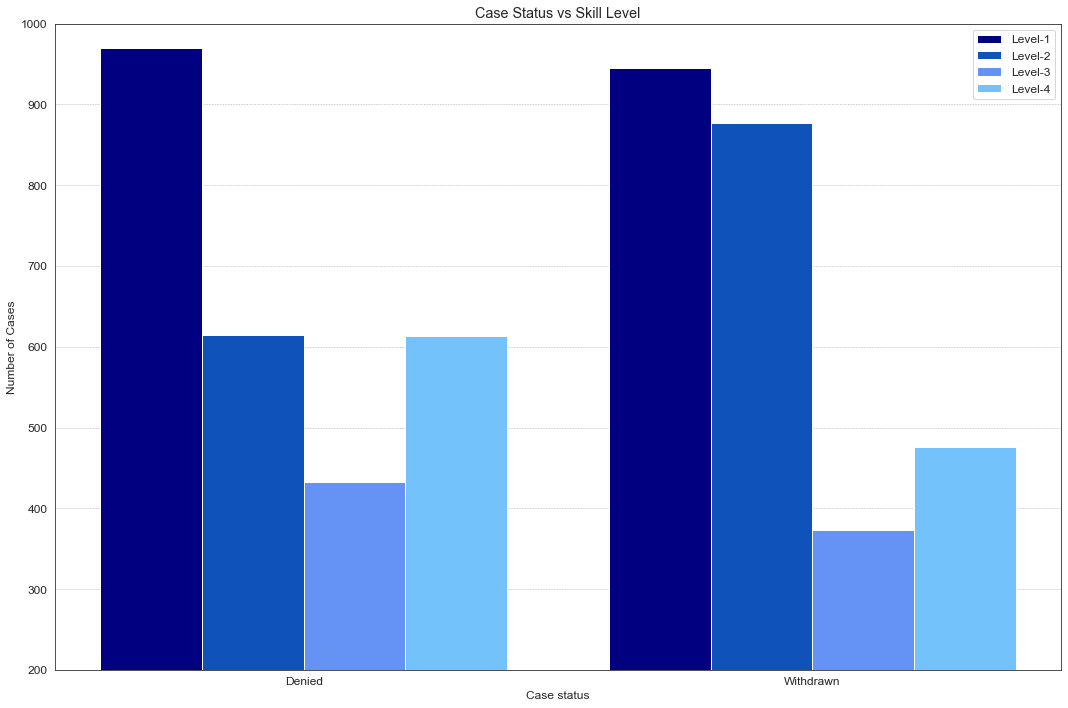

In [40]:
labels = ['Denied', 'Withdrawn']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x, skill_case_status.iloc[2:,0], width, color='#000080', label='Level-1')
ax.bar(x + width, skill_case_status.iloc[2:,1], width, color='#0F52BA', label='Level-2')
ax.bar(x + (2 * width), skill_case_status.iloc[2:,2], width, color='#6593F5', label='Level-3')
ax.bar(x + (3*width), skill_case_status.iloc[2:,3], width, color='#73C2FB', label='Level-4')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Cases')
ax.set_xlabel('Case status')
ax.set_title('Case Status vs Skill Level')
ax.set_xticks(x + width + width/2)
ax.set_ylim(200,1000)
ax.set_xticklabels(labels)
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.show()

**2.5.6. H-1B vs All Other Visa Types**

We identified that H-1B dominates the market of foreign workers. But how does the situation look for H-1B in comaprison with all other categories together? As we can see, patterns are very common too. H-1B itself provides the majority of foreign workforce to the US. There are over 65%  of H1B application in the given dataset and less than 3% denial for the given time period. Also There are more number of Level II applicants than the other and surprisingly  high denial rate for skill level 4 than any other level.

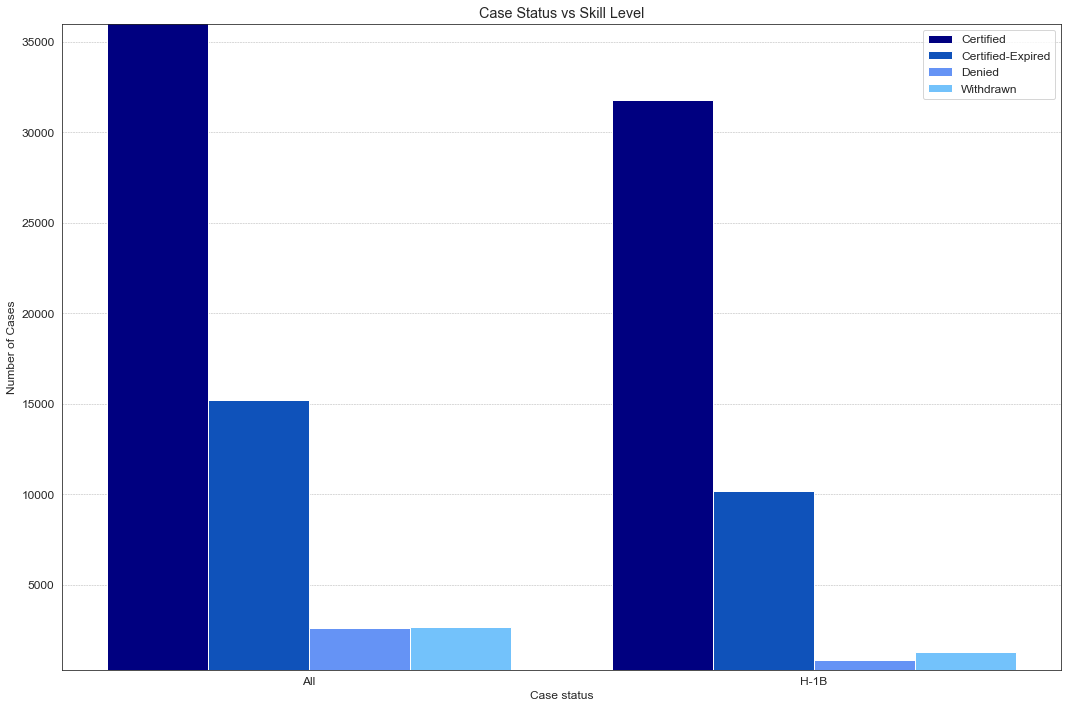

In [45]:
labels = ['Certified', 'Certified-Expired', 'Denied', 'Withdrawn']
labels = status_visa_DF.index.to_numpy()

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x, status_visa_DF.iloc[:,0], width, color='#000080', label='Certified')
ax.bar(x + width, status_visa_DF.iloc[:,1], width, color='#0F52BA', label='Certified-Expired')
ax.bar(x + (2 * width), status_visa_DF.iloc[:,2], width, color='#6593F5', label='Denied')
ax.bar(x + (3*width), status_visa_DF.iloc[:,3], width, color='#73C2FB', label='Withdrawn')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Cases')
ax.set_xlabel('Case status')
ax.set_title('Case Status vs Skill Level')
ax.set_xticks(x + width + width/2)
ax.set_ylim(300,36000)
ax.set_xticklabels(labels)
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.show()

**Question 2. Conclusion**
    
Several factors significantly affect the percentage of accepted applications, the mean wait time, and the mean salary.

Among them:

- visas of workers
- NAICS category of workers
- yearly salary of workers
- skill levels

Higher numbers increase chanches for a successful application and vice versa.

Besides we analyzed the duration of cases based on different factors:

- an applicant from a larger company has higher chance of getting accepted for the visa 
- education levels were considered important but as long as the applicant has above bachelor's degree, 
acceptance rate seems to be similar near high 70%. 
- location of the company matters, but probably because the majority of companies are located on both US coast
- the most famous Visa type in the US, H-1B was one of the lowest with around 125 days
- skill level makes difference for applicant - the lower it is, the higher the change to be rejected, especially if your salary is low